<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Graphs and Matrices 3: Test

## Table of contents

- [Exercise 1: A random walk](#RW)
- [Exercise 2: Letters $a$ come by three](#isolated)
- [Exercise 3: A coin game](#frog)
- [Exercise 4: Balls in bins](#color)



In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


FileNotFoundError: [Errno 2] No such file or directory: './style/custom2.css'

In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


<!--<div markdown=1 class="Rmk"> Here is the Latex code of a matrix that you can copy/paste throughout the notebook:
$$
M=
\begin{matrix}
v_1 \\ v_2 \\ v_3 
\end{matrix}
\begin{pmatrix}
1 & 1 & 0\\
0 & 0 & 1\\
0 & 1 & 0\\
\end{pmatrix}.
$$-->


<div markdown=1 class=Abstract>

# Please read!

#### Guidelines for graded notebooks

* This notebook is graded, you must submit the .pynb file on the moodle at the end of the session.
* Submission is due at 5:35 pm. No late submission is permitted.
* The work is **individual**. Copy/pasting has been very severely punished in previous years.
* You can access previous notebooks and the lecture notes (and any online documentation on numpy, python,...).
* The four exercises are independent. You can of course solve the exercices in any order.
* Each function must be tested (for your sake, it also must be commented).
* Mathematical explanations have to be given in the corresponding "Answer" cell (not as comments of the code). Try to be rigorous and concise.
* Here is a sample of a matrix in LateX that you can copy/paste if needed:
$$
A=
\begin{matrix}
 u \\ v \\ w 
\end{matrix}
\begin{pmatrix}
0 & 1 & 0  \\
0 & 0 & 0\\
0 &  1 & 1\\
\end{pmatrix}.
$$


Here is a sample of a code to define a matrix in numpy and raise it to some power:

In [3]:
TransitionMatrix=np.zeros([8,8])
for k in range(1, ):
    TransitionMatrix[k,k]=1/2
    TransitionMatrix[k,(k+1)%8]=1/2
print(TransitionMatrix)
print(np.linalg.matrix_power(TransitionMatrix,20))

[[0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.5 0.  0.  0.  0.  0.  0.  0.5]]
[[0.12475586 0.1612854  0.17655945 0.1612854  0.12475586 0.0887146
  0.07392883 0.0887146 ]
 [0.0887146  0.12475586 0.1612854  0.17655945 0.1612854  0.12475586
  0.0887146  0.07392883]
 [0.07392883 0.0887146  0.12475586 0.1612854  0.17655945 0.1612854
  0.12475586 0.0887146 ]
 [0.0887146  0.07392883 0.0887146  0.12475586 0.1612854  0.17655945
  0.1612854  0.12475586]
 [0.12475586 0.0887146  0.07392883 0.0887146  0.12475586 0.1612854
  0.17655945 0.1612854 ]
 [0.1612854  0.12475586 0.0887146  0.07392883 0.0887146  0.12475586
  0.1612854  0.17655945]
 [0.17655945 0.1612854  0.12475586 0.0887146  0.07392883 0.0887146
  0.12475586 0.1612854 ]
 [0.1612854  0.17655945 0.1612854  0.12475586 0.0887146  0.07392883
  0.

<a id='RW'></a>

## Exercise 1: A random walk

Fix $L\geq 3$ throughout the exercise. We consider the sequence of random variables $(X_0,X_1,X_2,\dots)$ with values in $\{0,1,\dots,L-1\}$ whose distribution is defined by:
* $X_0=0$
* For each $k\geq 1$,
$$
X_{k+1}=
\begin{cases}
X_k + 2\ \ \mathrm{mod}(L)&\text{ with probability }1/2,\\
X_k - 1\ \ \mathrm{mod}(L)&\text{ with probability }1/2.
\end{cases}
$$
The sequence $(X_k)_{k\geq 0}$ is called a  random walk on $\{0,1,\dots,L-1\}$.


<div markdown=1 class="DoIt"> 

1. Using a transition matrix on the set $\{0,1,\dots,L-1\}$ write a function which computes the function
$(k,\ell)\mapsto \mathbb{P}(X_k=\ell)$.
<br>
(For $L=20$ I find $\mathbb{P}(X_{15}=0)=0.091644...$.)

2. An important theorem in Markov chain theory (beyond the scope of MAA205) states that if $L$ is not divisible by $3$  then the distribution of $X_k$ tends to the  uniform distribution in $\{0,1,\dots,L-1\}$. Illustrate this result for $L=20$: draw a plot supporting that<br>
$$
\lim_{k\to +\infty}  \mathbb{P}(X_k=0) =\frac{1}{L}.
$$
<i>(Be aware that the convergence is quite slow.)</i>

[[0.  0.  0.5 0.  0.  0.  0.  0.5]
 [0.5 0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.5]
 [0.5 0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.5 0. ]]
The Probablity of at time 15 and in the position 0 is  0.091644


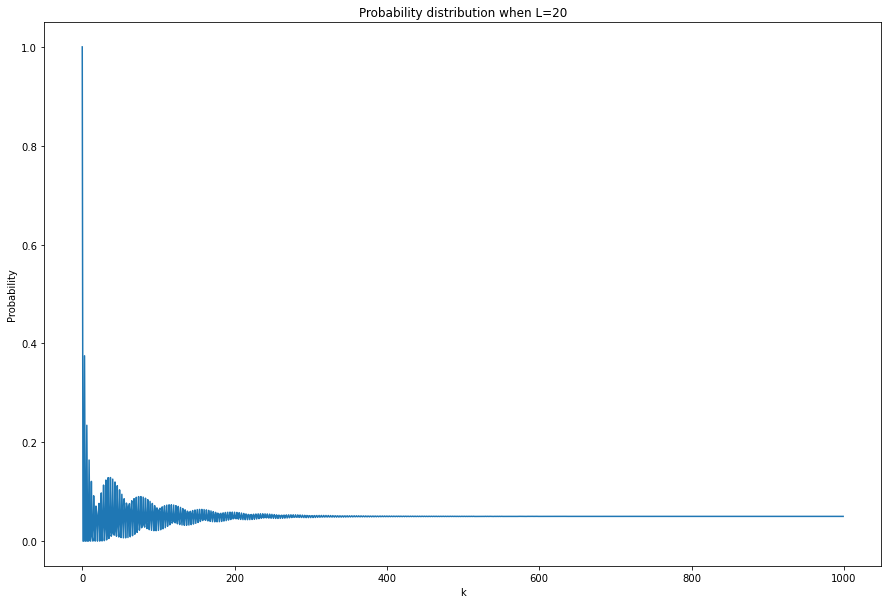

The Probablity of at time 15 and in the position 0 is  0.091644
The Probablity of at time 100 and in the position 0 is  0.021688
The Probablity of at time 1000 and in the position 0 is  0.05


In [83]:
# Question 1
def TransitionMatrix(n):
    mat = np.zeros([n, n])
    for k in range(n):
        mat[k, (k - 1) % n] = 1 / 2
        mat[k, (k + 2) % n] = 1 / 2

    return mat


print(TransitionMatrix(8))


def Probability(n, k, l):
    new_mat = np.linalg.matrix_power(TransitionMatrix(n), k)
    return new_mat[l, 0]


print('The Probablity of at time 15 and in the position 0 is ',
      round(Probability(20, 15, 0), 6))

# Question 2
result = [Probability(20, k, 0) for k in range(1000)]
plt.figure(figsize=(15, 10))
plt.plot(result)
plt.title('Probability distribution when L=20')
plt.xlabel('k')
plt.ylabel('Probability')
plt.show()

print('The Probablity of at time 15 and in the position 0 is ',
      round(Probability(20, 15, 0), 6))
print('The Probablity of at time 100 and in the position 0 is ',
      round(Probability(20, 100, 0), 6))
print('The Probablity of at time 1000 and in the position 0 is ',
      round(Probability(20, 1000, 0), 6))


<div markdown=1 class="Answers"> 

**Question 2.** Explain here how you did the plot.

I first compute and collect all the probability of $\mathbb{P}(X_k=0)$ corresponds to different value of $k$ from 1 to 1000. Then I plot the probability of $\mathbb{P}(X_k=0)$ against $k$. From the graph we can find that as $k \to \infty$, the probability tend to a straight line with value $\frac{1}{20}$. Therefore the graph supports the result that the distribution of $X_k$ tends to the uniform distribution in $\{0,1,\dots,L-1\}$ and from the result of computation for $k=1000$ we got $\mathbb{P}(X_{1000}=0)=0.05$ supports the conclusion
$$
\lim_{k\to +\infty}  \mathbb{P}(X_k=0) =\frac{1}{L}.
$$

<a id='isolated'></a>
## Exercise 2. Letters $a$ come by three

<div markdown=1 class="DoIt"> 

We consider words $w$ with letters $a,b$. For $n\geq 2$ let $I_n$ be the number of words $w=(w_1,w_2,\dots,w_n)$ of length $n$ such that runs of consecutive $a$'s all have length $\geq 3$. 

For example $I_5=7$ since the only possibilities are
$$
aaaaa,\ aaaab,\ aaabb,\ baaaa,\ baaab,\ bbaaa,\ bbbbb.
$$

Compute $I_{30}$ using a graph and its adjacency matrix. You must explain carefully which graph and which coefficients of the matrix you consider.

<i>(To check your result: I find $I_{10}=72$.)</i>


<div markdown=1 class="Answers"> 

From the result we got we have $I_{30}= 1089155$. And we check the number for $I_{10}= 72$ with our function.

We construction a graph that there are at least 3 nodes from $a$ to $a$ which we can denote $a$, $a_1$, $a_2$ and another $b$. For the relations in those nodes we got $a \to a_1$, $a_1 \to a_2$ and $a_2 \to b$ or to itself, $b \to a$ or to itself. In this case we can ensure that there are at least 3 nodes from $a$ to $a$. Therefore we can have the matrix that 
$$
A=
\begin{matrix}
a \\ a_{1} \\ a_{2} \\ b
\end{matrix}
\begin{pmatrix}
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 1 & 1\\
1 & 0 & 0 & 1
\end{pmatrix}.
$$
After we times the matrix to $n-1$ times and sum up all the elements in the last line of the matrix we can get the result of $I_{n}$.


In [61]:
# Your code here
Matrix = np.matrix([[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 1], [1, 0, 0, 1]])


# check
def Number_words(n):
    lis = []
    for i in range(2, n + 1):
        Mat = np.linalg.matrix_power(Matrix, i)
        MatBis = Mat[0:1]
        lis.append(np.sum(MatBis))
    return lis[-1]


print('The possibilities of solution in I5 is ', Number_words(5))
print('The possibilities of solution in I9 is ', Number_words(9))
print('The possibilities of solution in I10 is ', Number_words(10))
print('The possibilities of solution in I30 is ', Number_words(30))

The possibilities of solution in I5 is  7
The possibilities of solution in I9 is  44
The possibilities of solution in I10 is  72
The possibilities of solution in I30 is  1089155


<a id="frog"></a>
## Exercise 3: A coin game

We consider the following game of chance:<br><br>
Let $k\geq 1$ be an integer. A player starts with one euro, at each time step a fair coin is tossed. If the coin turns Heads then the player wins 2 euros, if the coin turns Tails then they lose 1 euro. The game goes until either the player is ruined, or just after the $k$-th coin has been tossed. 

Here are two sample games for $k=6$:
\begin{align*}
&1 \stackrel{\text{Heads}}{\longrightarrow} 3 \stackrel{\text{Tails}}{\longrightarrow} 2
\stackrel{\text{Tails}}{\longrightarrow} 1 \stackrel{\text{Tails}}{\longrightarrow} 0 \text{    (Ruined)},\\
&1 \stackrel{\text{Heads}}{\longrightarrow} 3 \stackrel{\text{Heads}}{\longrightarrow} 5
\stackrel{\text{Tails}}{\longrightarrow} 4 \stackrel{\text{Tails}}{\longrightarrow} 3
\stackrel{\text{Tails}}{\longrightarrow} 2 \stackrel{\text{Heads}}{\longrightarrow} 4
\text{    (Stop)}.
\end{align*}

Let $W\in \{0,1,2,\dots, 2k+1\}$ be the random variable given by the player's money at the end of the game. In the above examples $W=0$ and $W=4$ respectively.


<div markdown=1 class="DoIt"> 

1. Using a Markov chain, write a function which computes the probability $p_k$ that the player is ruined at the end of the game (<i>i.e.</i> $\mathbb{P}(W=0)$). Explain your strategy.
<br>
<i>(To check your result, I find $p_{40}\approx 0.6171...$.)</i>
2. Plot the distribution of $W$ for $k=20$.

<div markdown=1 class="Answers"> Question 1.

We can use the Markov chain to compute the probability $p_k$ that the player is ruined at the end of the game. We can construct a graph that there are $2k+1$ nodes and the relation between the nodes is that the node $i$ can go to the node $i+2$ or $i-1$ each case with probability 1/2. Therefore we can have the matrix that
$$
Q= \begin{matrix}
0 \\ 1 \\ \vdots \\ i \\ \vdots  \\ N-1 \\ N
\end{matrix}
\begin{pmatrix}
1 & 0   & 0 & 0   & 0  & 0 & 0\\
1/2 & 0 & 0 & 1/2 & 0  & 0 & 0\\
 &  & \ddots &  &   & & \\
0 & 0 & 1/2 & 0 & 0  & 1/2 & 0\\
 &  &  &  & \ddots  &  & \\
0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$
Then we multiply the matrix to $k$ times and we want to find the end points which just track the point from 1 to the end point in the graph. Assume the end point is $m$ then we can just locate the point in the matrix with $Q_{1, k}$ which is the result

[[1.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.5 0.  0. ]
 [0.  0.5 0.  0.  0.5 0. ]
 [0.  0.  0.5 0.  0.  0.5]
 [0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  1. ]]
The probability of p40 = 0 is 0.61711


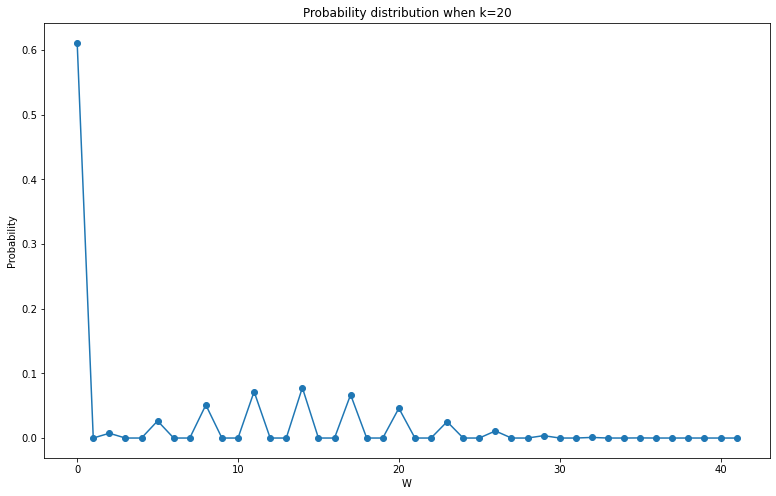

In [95]:
# Question 1
def Matrix_coins(n):
    W = 2 * n + 1
    Matrix = np.zeros([W + 1, W + 1])
    Matrix[W, W] = 1
    # initialisation
    Matrix[W - 1, W - 1] = 1
    Matrix[0, 0] = 1
    for k in range(1, W - 1):
        Matrix[k, k - 1] = 1 / 2
        Matrix[k, k + 2] = 1 / 2
    return Matrix


print(Matrix_coins(2))


def Probability_coin(k, m):
    mat = np.linalg.matrix_power(Matrix_coins(2 * k + 1), k)
    return mat[1, m]


print('The probability of p40 = 0 is', np.round(Probability_coin(40, 0), 6))

# Question 2
result = [Probability_coin(20, m) for m in range(2 * 20 + 2)]
plt.figure(figsize=(13, 8))
plt.title('Probability distribution when k=20')
plt.xlabel('W')
plt.ylabel('Probability')
plt.plot(result, 'o-')
plt.show()



<a id='color'></a>
## Exercise 4. Balls in bins

<div markdown=1 class="DoIt"> 

A urn contains 5 balls, one of each color: Black, White, Red, Green, Yellow (B,W,R,G,Y). At time $1,2,3,\dots$ a ball is drawn uniformly at random and put back into the urn. For $n\geq 1$ denote by $X_n \in\{B,W,R,G,Y\}$ the color of the $n$-th ball.

For $n\geq 3$ let $E_n$ be the event
\begin{align*}
E_n&=\{\text{ The Green ball has been drawn at least 3 times in a row before time }n\ \}\\
&=\{\exists\ 1\leq k\leq n-2\text{ such that }X_{k}=X_{k+1}=X_{k+2}=G\}.
\end{align*}
<br>
It is easy to see that
$$
\mathbb{P}(E_3)=\mathbb{P}(X_{1}=X_{2}=X_{3}=G)= (1/5)^3=0.008.
$$
but there is no obvious way to compute $\mathbb{P}(E_n)$ for arbitrary $n$.

The goal of the exercise is to solve this problem with Markov chains. We first introduce a graph $\mathcal{R}$ with vertices $\{r_0,r_1,r_2,r_3\}$. We define a Markov chain $(M_n)_{n\geq 0}$ on $\mathcal{R}$ which keeps track of the current record of consecutive $G$'s. Formally $(M_n)_{n\geq 0}$ is defined as follows: $M_0=r_0$ and for $n\geq 1$,

* $M_n=r_0$ if:
    * $E_n$ is not true and $X_n\neq G$.
* $M_n=r_1$ if:
    * $E_n$ is not true and $X_n=G$, $X_{n-1}\neq G$.
* $M_n=r_2$ if:
   * $n\geq 2$, $E_n$ is not true and $X_n=G,X_{n-1}= G,X_{n-2}\neq G$
* $M_n=r_3$ if
   * $E_n$ is true.

Here is an example:

<font>
<table>
<tr>
<td > $n$</td>
<td >$0$</td><td >$1$</td><td >$2$</td><td >$3$</td><td >$4$</td><td >$5$</td><td >$6$</td><td >$7$</td><td >$8$</td>
</tr>
<tr>
<td > $X_n$</td>
<td >$/$</td><td >$B$</td><td >$G$</td><td >$Y$</td><td >$G$</td><td >$G$</td><td >$G$</td><td >$G$</td><td >$B$</td>
</tr>
<tr>
<td > $M_n$</td>
<td >$r_0$</td><td >$r_0$</td><td >$r_1$</td><td >$r_0$</td><td >$r_1$</td><td >$r_2$</td><td >$r_3$</td><td >$r_3$</td><td >$r_3$</td>           </tr>
</table>
</font>

<b>Question 1</b>. We admit that $(M_n)$ defined as above is a Markov chain. Find its transition matrix
(explain briefly). 

<b>Question 2</b>.
Write a function which computes $\mathbb{P}(E_n)$ for every $n$. (Explain briefly how you use the transition matrix.)

<i>(In order to check your result: I find $\mathbb{P}(E_{10})=0.052349...$)</i>

<b>Question 3</b>. Find the minimal $n$ such that $E_n$ occurs with more than $90\%$ chance.


<div markdown=1 class="Answers"> 

Question 1. 

We can have the markov chain like this 
$$
A=
\begin{matrix}
r_0 \\ r_{1} \\ r_{2} \\ r_3
\end{matrix}
\begin{pmatrix}
4/5 & 1/5 & 0 & 0\\
4/5 & 0 & 1/5 & 0\\\
4/5 & 0 & 0 & 1/5\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$
Since we have the probability of 1/5 to get a green ball and the probability of 4/5 to get a non-green ball. When $E_n$ is not true and we get a ball in other color, then we go back to stage $r_0$. Since we reach stage $r_3$ we would stay there.

Question 2.

Since we have the transition graph from quesition 1, then we can just simply multiple it with $n$ times and return the position of $Q_{1,4}$ since this node means from stage $r_0$ to stage $r_3$ which is the probability of $E_n$ is true.

Question 3.
From the result our our program we got the minimal $n$ is 354 such that $\mathbb{P}(E_{n}) > 0.9$


In [93]:
# Question 2
Matrix = np.matrix([[4 / 5, 1 / 5, 0, 0], 
                    [4 / 5, 0, 1 / 5, 0],
                    [4 / 5, 0, 0, 1 / 5], 
                    [0, 0, 0, 1]])


def ProbabilityE(n):
    mat = np.linalg.matrix_power(Matrix, n)
    return round(mat[0, -1], 6)
    
# test
print('The probability of E10 is', ProbabilityE(10))



The probability of E10 is 0.052349


In [94]:
# Question 3
def break_value(p):
    n = 1
    while n >=1:
        prob = ProbabilityE(n)
        if prob >= p:
            break
        n += 1
    
    return n

print('The minimal n that En bigger than 0.9 is ', break_value(0.9))

# check
print('The probability of E354 is', ProbabilityE(354))
print('The probability of E353 is', ProbabilityE(353))

The minimal n that En bigger than 0.9 is  354
The probability of E354 is 0.900381
The probability of E353 is 0.899727
